# Plotting Emergence Results

This notebook demonstrates how to visualize emergence measure results. For automated plotting of all parameter combinations, use:

```bash
poetry run python scripts/plot_emergence_heatmaps.py
```

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Load results
emergence_df = pd.read_pickle('../results/analyses/emergence_results.pkl')

print(f"Shape: {emergence_df.shape}")
print(f"Measures: {emergence_df['measure'].unique().tolist()}")
print(f"Time lags (model): {sorted(emergence_df['time_lag_for_model'].unique().tolist())}")
print(f"Time lags (measure): {sorted(emergence_df['time_lag_for_measure'].unique().tolist())}")
print(f"Redundancy functions: {emergence_df['red_func'].unique().tolist()}")

Shape: (2400, 10)
Measures: ['phiid_wpe', 'phiid_dc', 'phiid_cd']
Time lags (model): [1, 10]
Time lags (measure): [1, 10]
Redundancy functions: ['mmi', 'ccs']


## 1. Single Heatmap

Plot one measure for a specific parameter combination.

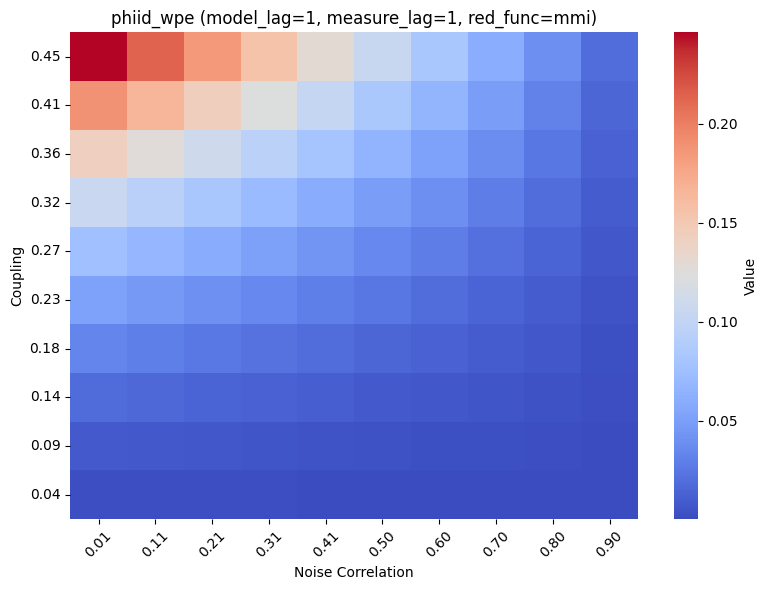

In [12]:
# Filter data for specific parameters
df_filtered = emergence_df[
    (emergence_df['measure'] == 'phiid_wpe') & 
    (emergence_df['time_lag_for_model'] == 1) & 
    (emergence_df['time_lag_for_measure'] == 1) & 
    (emergence_df['red_func'] == 'mmi')
]

# Create pivot table: coupling (y) vs noise_corr (x)
pivot = pd.pivot_table(
    df_filtered, 
    values='value', 
    index='coupling', 
    columns='noise_corr', 
    aggfunc='first'
)
pivot = pivot.sort_index(ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pivot, cmap='coolwarm', ax=ax, cbar_kws={'label': 'Value'})

# Format tick labels with rounding
n_xticks = min(10, len(pivot.columns))
n_yticks = min(10, len(pivot.index))
xtick_positions = np.linspace(0, len(pivot.columns) - 1, n_xticks, dtype=int)
ytick_positions = np.linspace(0, len(pivot.index) - 1, n_yticks, dtype=int)
ax.set_xticks(xtick_positions + 0.5)
ax.set_xticklabels([f'{pivot.columns[i]:.2f}' for i in xtick_positions], rotation=45)
ax.set_yticks(ytick_positions + 0.5)
ax.set_yticklabels([f'{pivot.index[i]:.2f}' for i in ytick_positions])

ax.set_xlabel('Noise Correlation')
ax.set_ylabel('Coupling')
ax.set_title('phiid_wpe (model_lag=1, measure_lag=1, red_func=mmi)')
plt.tight_layout()
plt.show()

## 2. Compare All Three Measures

Side-by-side comparison of WPE, DC, and CD.

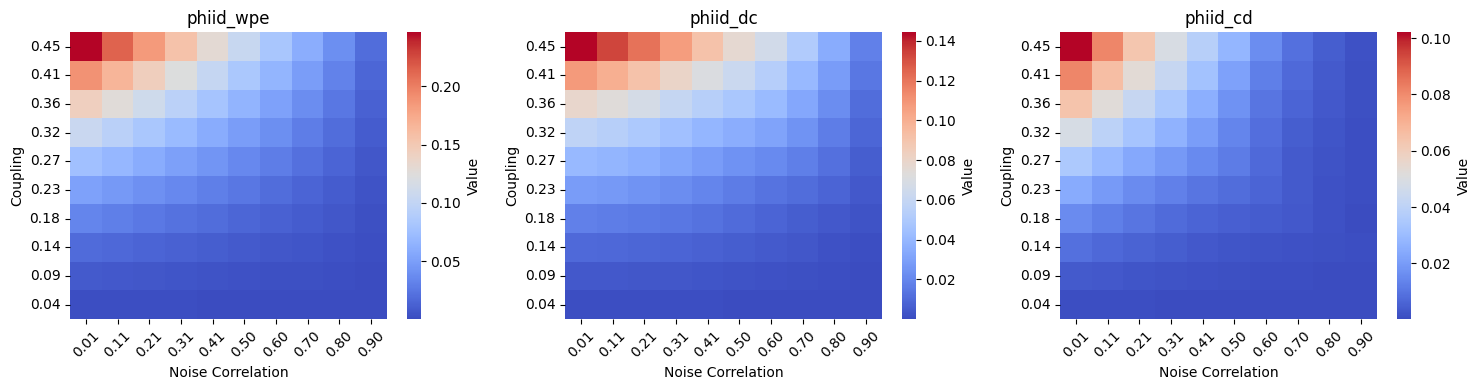

In [13]:
measures = ['phiid_wpe', 'phiid_dc', 'phiid_cd']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, measure in enumerate(measures):
    df_m = emergence_df[
        (emergence_df['measure'] == measure) & 
        (emergence_df['time_lag_for_model'] == 1) & 
        (emergence_df['time_lag_for_measure'] == 1) & 
        (emergence_df['red_func'] == 'mmi')
    ]
    
    pivot = pd.pivot_table(df_m, values='value', index='coupling', columns='noise_corr', aggfunc='first')
    pivot = pivot.sort_index(ascending=False)
    
    sns.heatmap(pivot, cmap='coolwarm', ax=axes[idx], cbar_kws={'label': 'Value'})
    
    # Format tick labels
    n_xticks = min(10, len(pivot.columns))
    n_yticks = min(10, len(pivot.index))
    xtick_positions = np.linspace(0, len(pivot.columns) - 1, n_xticks, dtype=int)
    ytick_positions = np.linspace(0, len(pivot.index) - 1, n_yticks, dtype=int)
    axes[idx].set_xticks(xtick_positions + 0.5)
    axes[idx].set_xticklabels([f'{pivot.columns[i]:.2f}' for i in xtick_positions], rotation=45)
    axes[idx].set_yticks(ytick_positions + 0.5)
    axes[idx].set_yticklabels([f'{pivot.index[i]:.2f}' for i in ytick_positions])
    
    axes[idx].set_xlabel('Noise Correlation')
    axes[idx].set_ylabel('Coupling')
    axes[idx].set_title(measure)

plt.tight_layout()
plt.show()

## 3. Compare Redundancy Functions (MMI vs CCS)

Different redundancy measures can yield different emergence patterns.

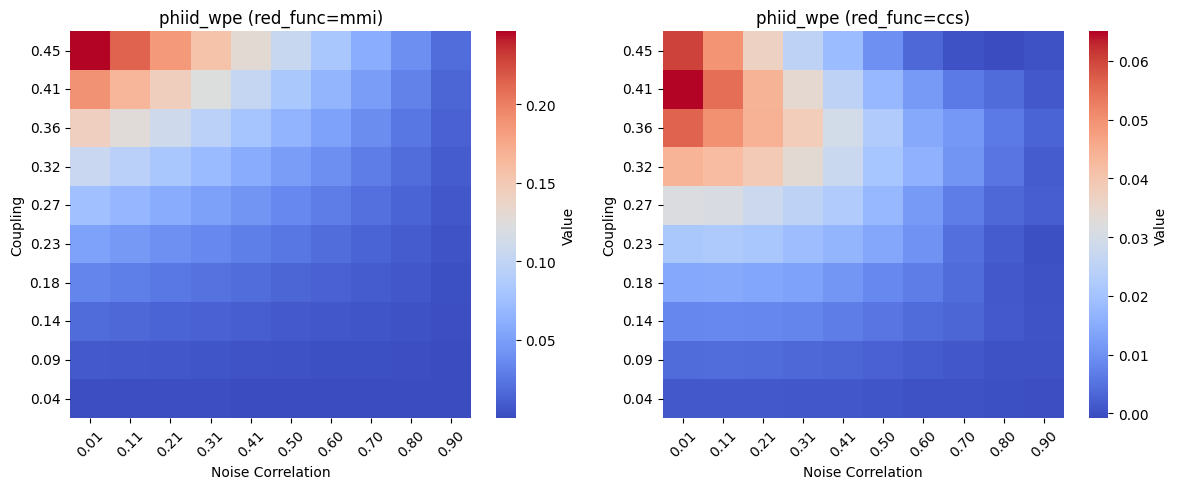

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, rf in enumerate(['mmi', 'ccs']):
    df_rf = emergence_df[
        (emergence_df['measure'] == 'phiid_wpe') & 
        (emergence_df['time_lag_for_model'] == 1) & 
        (emergence_df['time_lag_for_measure'] == 1) & 
        (emergence_df['red_func'] == rf)
    ]
    
    pivot = pd.pivot_table(df_rf, values='value', index='coupling', columns='noise_corr', aggfunc='first')
    pivot = pivot.sort_index(ascending=False)
    
    sns.heatmap(pivot, cmap='coolwarm', ax=axes[idx], cbar_kws={'label': 'Value'})
    
    # Format tick labels
    n_xticks = min(10, len(pivot.columns))
    n_yticks = min(10, len(pivot.index))
    xtick_positions = np.linspace(0, len(pivot.columns) - 1, n_xticks, dtype=int)
    ytick_positions = np.linspace(0, len(pivot.index) - 1, n_yticks, dtype=int)
    axes[idx].set_xticks(xtick_positions + 0.5)
    axes[idx].set_xticklabels([f'{pivot.columns[i]:.2f}' for i in xtick_positions], rotation=45)
    axes[idx].set_yticks(ytick_positions + 0.5)
    axes[idx].set_yticklabels([f'{pivot.index[i]:.2f}' for i in ytick_positions])
    
    axes[idx].set_xlabel('Noise Correlation')
    axes[idx].set_ylabel('Coupling')
    axes[idx].set_title(f'phiid_wpe (red_func={rf})')

plt.tight_layout()
plt.show()

## 4. Compare Time Lags

The time scale at which you measure emergence can affect results.

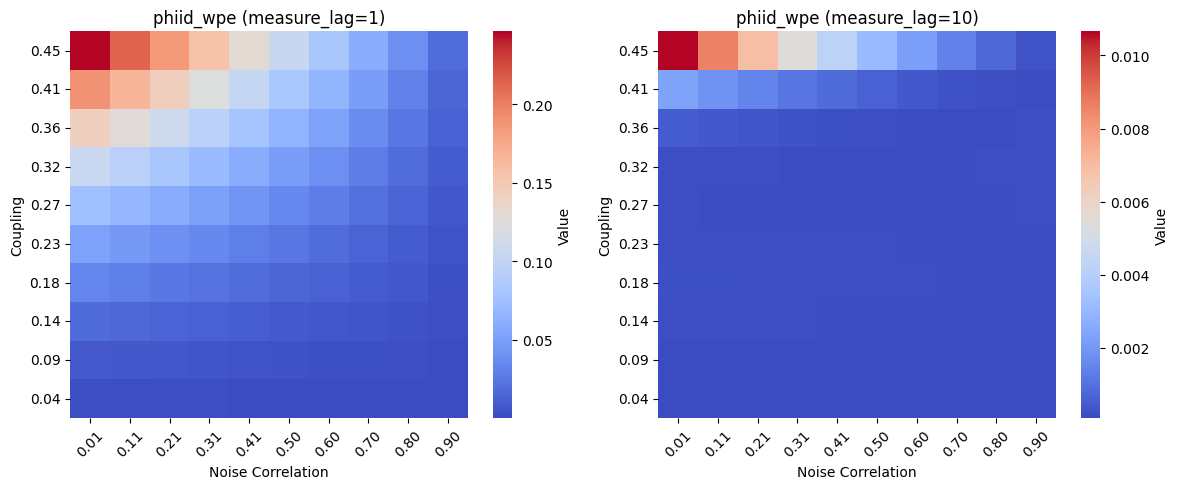

In [15]:
time_lags = sorted(emergence_df['time_lag_for_measure'].unique().tolist())

fig, axes = plt.subplots(1, len(time_lags), figsize=(6*len(time_lags), 5))
if len(time_lags) == 1:
    axes = [axes]

for idx, tl in enumerate(time_lags):
    df_tl = emergence_df[
        (emergence_df['measure'] == 'phiid_wpe') & 
        (emergence_df['time_lag_for_model'] == 1) & 
        (emergence_df['time_lag_for_measure'] == tl) & 
        (emergence_df['red_func'] == 'mmi')
    ]
    
    pivot = pd.pivot_table(df_tl, values='value', index='coupling', columns='noise_corr', aggfunc='first')
    pivot = pivot.sort_index(ascending=False)
    
    sns.heatmap(pivot, cmap='coolwarm', ax=axes[idx], cbar_kws={'label': 'Value'})
    
    # Format tick labels
    n_xticks = min(10, len(pivot.columns))
    n_yticks = min(10, len(pivot.index))
    xtick_positions = np.linspace(0, len(pivot.columns) - 1, n_xticks, dtype=int)
    ytick_positions = np.linspace(0, len(pivot.index) - 1, n_yticks, dtype=int)
    axes[idx].set_xticks(xtick_positions + 0.5)
    axes[idx].set_xticklabels([f'{pivot.columns[i]:.2f}' for i in xtick_positions], rotation=45)
    axes[idx].set_yticks(ytick_positions + 0.5)
    axes[idx].set_yticklabels([f'{pivot.index[i]:.2f}' for i in ytick_positions])
    
    axes[idx].set_xlabel('Noise Correlation')
    axes[idx].set_ylabel('Coupling')
    axes[idx].set_title(f'phiid_wpe (measure_lag={tl})')

plt.tight_layout()
plt.show()

## 5. Using the Plotting Functions

You can also use the plotting functions from `plot_emergence_heatmaps.py`.

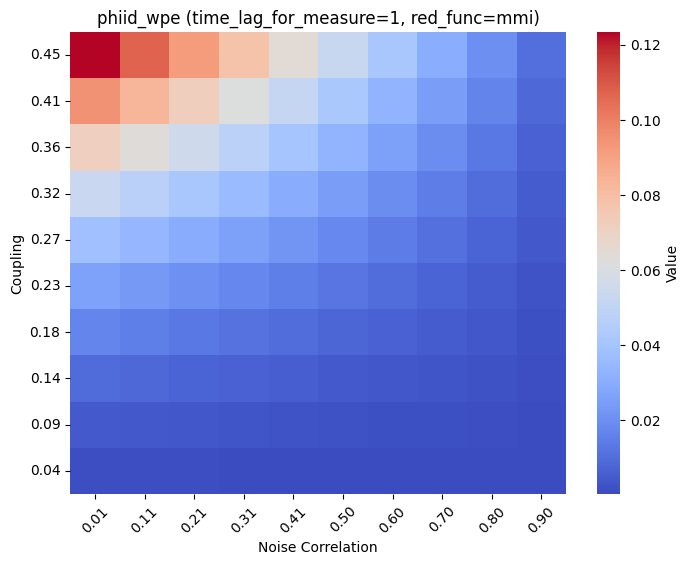

In [16]:
from plot_emergence_heatmaps import (
    plot_emergence_heatmap,
    plot_all_measures,
    plot_parameter_comparison
)

# Single heatmap
fig, ax = plt.subplots(figsize=(8, 6))
plot_emergence_heatmap(
    emergence_df,
    'phiid_wpe',
    ax=ax,
    time_lag_for_measure=1,
    red_func='mmi'
)
plt.show()

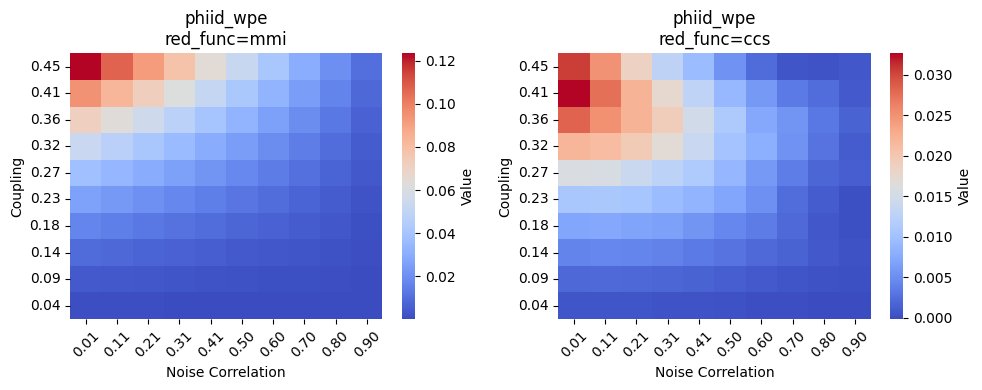

In [17]:
# Compare parameter values
plot_parameter_comparison(
    emergence_df,
    'phiid_wpe',
    compare_param='red_func',
    compare_values=['mmi', 'ccs'],
    time_lag_for_measure=1
)
plt.show()

## 6. Saving Plots

Save individual plots or use the automated script.

In [18]:
# Create output directory
os.makedirs('../results/plots', exist_ok=True)

# Save a single plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_emergence_heatmap(
    emergence_df,
    'phiid_wpe',
    ax=ax,
    time_lag_for_measure=1,
    red_func='mmi'
)
fig.savefig('../results/plots/my_custom_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print('Saved to results/plots/my_custom_plot.png')

Saved to results/plots/my_custom_plot.png


## 7. Visualize Time-Series Data

Understand what the raw data looks like before computing emergence measures. This shows the micro-level (individual nodes) and macro-level (population sum) time-series.

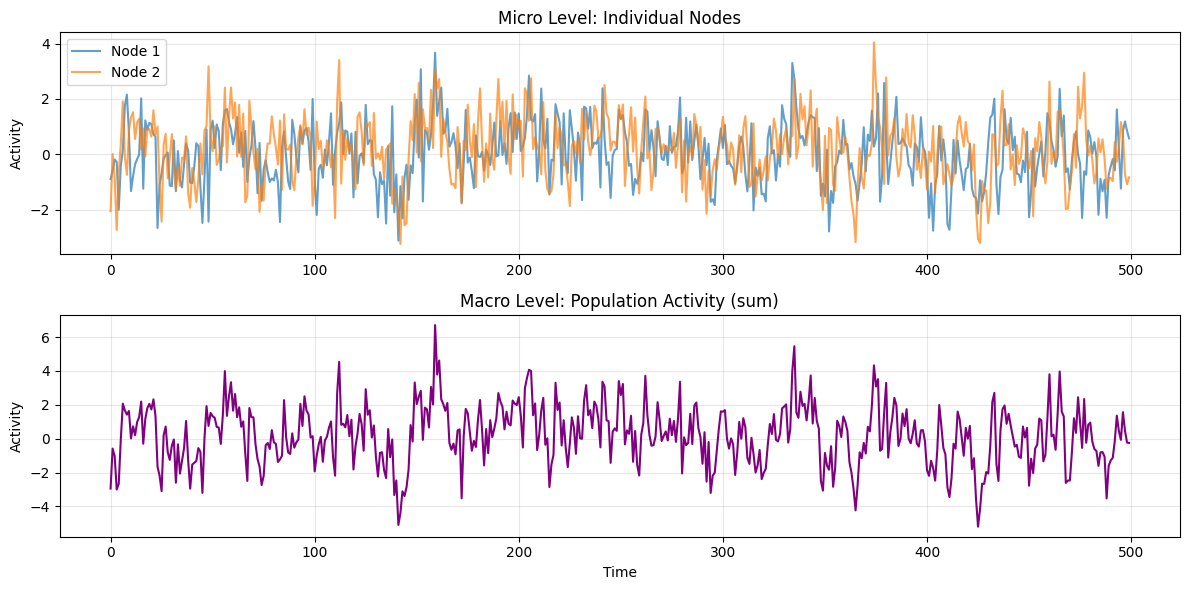

In [19]:
import complexpy.data_simulation as ds

# Generate data
data_dict = ds.generate_2node_mvar_data(
    coupling=0.3, noise_corr=0.0, time_lag_for_model=1,
    npoints=500, macro_func_mvar=ds.sum_micro_mvar,
    micro_func_mvar=ds.raw_micro_mvar
)

# Plot
time = np.arange(500)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, data_dict['micro'][0, :], label='Node 1', alpha=0.7)
plt.plot(time, data_dict['micro'][1, :], label='Node 2', alpha=0.7)
plt.ylabel('Activity')
plt.legend()
plt.title('Micro Level: Individual Nodes')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(time, data_dict['macro'], color='purple')
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title('Macro Level: Population Activity (sum)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Automated Plotting

To generate plots for ALL parameter combinations automatically:

```bash
poetry run python scripts/plot_emergence_heatmaps.py
```

This creates one PNG file per measure for each combination of `time_lag_for_model`, `time_lag_for_measure`, and `red_func`.